In [15]:
import pkg_resources

installed_packages = pkg_resources.working_set
#print(installed_packages)
installed_packages_list = sorted(["%s==%s" % (i.key, i.version)
     for i in installed_packages])
#print(installed_packages_list)


In [17]:
necessary_packages = ['numpy',
                 'pandas',
                 'pymatgen',
                 'seaborn',
                 'matplotlib',
                 'scikit-learn',
                 'example-missing-package'
                 ]
print(necessary_packages)

['numpy', 'pandas', 'pymatgen', 'seaborn', 'matplotlib', 'scikit-learn', 'example-missing-package']


In [19]:
current_packages = sorted(["%s" % (package.key) for package in installed_packages if package.key in necessary_packages])
current_packages_plus_version = sorted(["%s==%s" % (package.key, package.version) for package in installed_packages if package.key in necessary_packages])
missing_packages = sorted([package for package in necessary_packages if package not in current_packages])

print('You have the current packages installed:')
for package in current_packages_plus_version:
    print('    ' + package)
    
print('\nYou are missing the following package(s):')
for package in missing_packages:
    print('    ' + package)

You have the current packages installed:
    matplotlib==3.0.2
    numpy==1.15.4
    pandas==0.23.4
    scikit-learn==0.20.1
    seaborn==0.9.0

You are missing the following package(s):
    example-missing-package
    pymatgen


In [2]:
import pandas as pd
heat_capacity_dataframe = pd.read_csv('heat_capacity_298K.csv')
heat_capacity_dataframe[1:10]

,FORMULA,PROPERTY: Heat Capacity (J/mol K)
1,Al1Br3,100.578
2,Al1Cl1O1,56.902
3,Al1Cl3,91.128
4,Al1Cl4K1,156.482
5,Al1Cl4Na1,154.975
6,Al1Cl6K3,248.906
7,Al1Cl6Na3,244.136
8,Al1F3,75.132
9,Al1F6K3,222.798


In [4]:
sliced_list = heat_capacity_dataframe['PROPERTY: Heat Capacity (J/mol K)'][0:5]
print(sliced_list)

0     24.209
1    100.578
2     56.902
3     91.128
4    156.482
Name: PROPERTY: Heat Capacity (J/mol K), dtype: float64


In [11]:
# allows for plots in jupyter notebook
import matplotlib.pyplot as plt

import seaborn as sns
# generates the normal curve cosest to our data
from scipy.stats import norm 
from scipy import stats

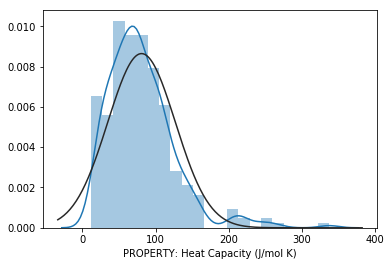

In [12]:
# make graph to visiualize distribution of heat capacities
sns.distplot(heat_capacity_dataframe['PROPERTY: Heat Capacity (J/mol K)'], fit=norm)

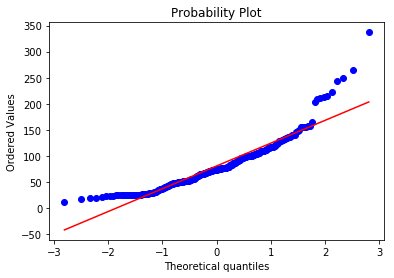

In [15]:
fig = plt.figure()
res = stats.probplot(heat_capacity_dataframe['PROPERTY: Heat Capacity (J/mol K)'], plot=plt)

In [16]:
import numpy as np

In [18]:
# here we do a log transformation. this can often help normalize data
log_cp = np.log(heat_capacity_dataframe['PROPERTY: Heat Capacity (J/mol K)'])
print(log_cp[1:10])

1    4.610934
2    4.041330
3    4.512265
4    5.052941
5    5.043264
6    5.517075
7    5.497725
8    4.319247
9    5.406266
Name: PROPERTY: Heat Capacity (J/mol K), dtype: float64


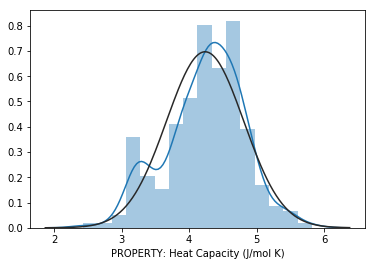

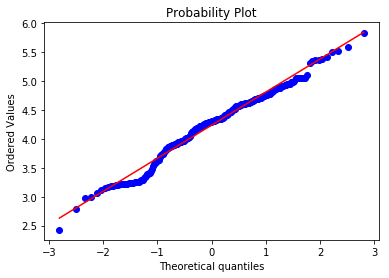

In [19]:
sns.distplot(log_cp, fit=norm)
fig = plt.figure()
res = stats.probplot(log_cp, plot=plt)

In [60]:
import pymatgen as mg

element_data = pd.read_csv(r'simple_element_properties.csv', index_col=0)

def get_features(formula):
    '''
    Input
    ----------
    formula: string
        put a valid chemical fomula as a sting. Example( 'NaCl')

    Output
    ----------
    features: np.array()
        This is an 1x252 length array containing feature values for use in the
        machine learning model.
    '''
    try:
        # get fractional and elemental compositions (e.g. Na0.5Cl0.5 or Na1Cl1)
        fractional_composition = mg.Composition(formula).fractional_composition.as_dict()
        element_composition = mg.Composition(formula).element_composition.as_dict()
        
        # create arrays for average and sum of features
        avg_feature = np.zeros(len(element_data.iloc[0]))
        sum_feature = np.zeros(len(element_data.iloc[0]))
        for key in fractional_composition:
            try:
                # calculate average and sum of features
                avg_feature += element_data.loc[key].values * fractional_composition[key]
                sum_feature += element_data.loc[key].values * element_composition[key]
            except:
                print('The element:', key, 'is not currently supported in our database')
                return np.array([np.nan]*len(element_data.iloc[0])*4)
            
        # get variance and range of the feature values
        var_feature = element_data.loc[list(fractional_composition.keys())].var()
        range_feature = element_data.loc[list(fractional_composition.keys())].max()-element_data.loc[list(fractional_composition.keys())].min()

        # concatenate features vector
        features = pd.DataFrame(np.concatenate([avg_feature, sum_feature, np.array(var_feature), np.array(range_feature)]))
        # features = np.concatenate([avg_feature, sum_feature, np.array(var_feature), np.array(range_feature)])
        return features.transpose()
    except:
        print('There was and error with the Formula: '+ formula + ', this is a general exception with an unkown error')
        return [np.nan]*len(element_data.iloc[0])*4

In [61]:
element_data.loc['Na'].values

array([1.10000e+01, 2.29900e+01, 3.00000e+00, 1.00000e+00, 1.00000e+00,
       2.00000e+00, 0.00000e+00, 1.90000e+00, 1.80000e+02, 1.54000e+00,
       2.65000e+00, 1.80000e+00, 1.71300e+02, 1.16000e+00, 9.30000e-01,
       8.90000e-01, 9.50000e-01, 2.85000e+00, 2.54000e+00, 2.85000e+00,
       8.70000e-01, 1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 6.00000e+00,
       1.00000e+01, 1.40000e+01, 1.00000e+00, 4.96000e+02, 2.36000e+01,
       3.70950e+02, 1.15615e+03, 4.00000e-02, 9.70000e-01, 2.82800e+01,
       1.23000e+00, 2.60000e+00, 9.69600e+01, 1.41000e+02, 1.09000e+02,
       1.11000e+00, 6.80000e+00, 5.50000e-01, 2.37800e+01, 2.36000e+00,
       3.30000e+00, 1.00000e+00, 3.66000e+02, 2.57300e+03, 1.56500e+02,
       1.55000e+02, 2.65000e+00])

In [62]:
a = np.array([11,17])

In [55]:
a.var()

9.0

In [63]:
list(fractional_composition.keys())

['Na', 'Cl']

In [64]:
element_data.loc[list(fractional_composition.keys())]

,Atomic_Number,Atomic_Weight,Period,group,families,Mendele_Number,l_quantum_number,Atomic_Radus,Miracle_Radius_[pm],Covalent_Radius,...,nws(e/au3),volume(10-6m3),Work_function,G,abs_valence,Nearest_Neighbor_Distance(pm),Critical_Temperature,Low_Temp_Debye(K),High_Temp_Debye(K),Atomic_Concentration(1e-23_cm-3)
Symbol,,,,,,,,,,,,,,,,,,,,,
Na,11,22.99,3,1,1,2,0,1.90,180.0,1.54,...,0.55,23.78,2.36,3.3,1,366.0,2573.00,156.5,155.0,2.65
Cl,17,35.45,3,17,8,94,1,0.79,NaN,0.99,...,NaN,NaN,NaN,NaN,5,202.0,416.96,NaN,NaN,NaN


In [65]:
# create empy lists to add features, and targets to
features = []
targets = []

for formula, target in zip(heat_capacity_dataframe['FORMULA'],
                           heat_capacity_dataframe[
                               'PROPERTY: Heat Capacity (J/mol K)']):
    # send the formula into the get_features function. Saves the feature vector
    features.append(get_features(formula))
    targets.append(target)
    
# define the features and target for machine learning
df_features = pd.DataFrame(features)

# a series is the 'vector' version of a dataframe.
# you will usually want your target vector to be a series if using sklearn
# for machine learning.
df_targets = pd.Series(targets)